In [1]:
import plotly.io as pio
pio.renderers.default = "vscode+jupyterlab+notebook_connected"

# **Project 3: Analysis of Healthcare Expenses vs Household and Personal Income**

## Project Overview

- **Datasets to be used:**
  - **Healthcare Expenses Dataset**: Contains yearly premiums for single and family coverage from 1999 to 2018 ([Single and Family Premiums Data | KFF](https://www.kff.org/interactive/premiums-and-worker-contributions-among-workers-covered-by-employer-sponsored-coverage-1999-2018/#/?compare=true&coverageGroupComp=family)).
  - **Household Income Dataset**: Median household income in the U.S., spanning multiple decades ([Median Household Income in the United States | FRED](https://fred.stlouisfed.org/series/MEHOINUSA646N)).
  - **Personal Income Dataset**: Median personal income in the U.S. from 1974 onwards ([Median Personal Income in the United States | FRED](https://fred.stlouisfed.org/series/MEPAINUSA646N)).

- **Analysis question:**
  - How have single and family healthcare expenses changed relative to household and personal incomes in the U.S. over time? Are healthcare expenses growing proportionally to income?

- **Columns that will (likely) be used:**
  - From Healthcare Expenses Dataset:
    - `Category` (Single/Family Premiums)
    - `Year`
    - `Estimate` (Healthcare Expense)
  - From Household Income Dataset:
    - `DATE`
    - `MEHOINUSA646N` (Household Income)
  - From Personal Income Dataset:
    - `DATE`
    - `MEPAINUSA646N` (Personal Income)

- **Columns to be used to merge/join them:**
  - `Year` from Healthcare Expenses Dataset
  - `DATE` from Household and Personal Income Datasets

- **Hypothesis:**
  - **Hypothesis 1**: Healthcare expenses have increased significantly over time, but not proportionally to household and personal income growth.
  - **Hypothesis 2**: Higher household and personal incomes are positively correlated with higher healthcare expenses.

- **Proposed Steps**:
  - Cleaning each datasets to merge
  - Merge datasets by year and inspect for missing values or inconsistencies.
  - Analyze trends in healthcare expenses and income over time using line plots.
  - Visualize relationships using scatter and lines plots.

- **Follow-up Question**:
  - If healthcare expenses are not proportional to income growth, what factors might explain the disparity (e.g., inflation, regional differences, policy changes)?
  - Are premiums growing faster for single or family coverage?

- **Site URL:** [Project 3: Analysis of Healthcare Expenses vs Household and Personal Income](https://project-3-for-computing-in-context.readthedocs.io/en/latest/project_3.html)


## **1. Cleaning the Datasets**

### **1-1. Load the datasets**

In [2]:
import pandas as pd

healthcare_data = pd.read_csv('single_household_premiums_data.csv')
household_income_data = pd.read_csv('MEHOINUSA646N.csv')
personal_income_data = pd.read_csv('MEPAINUSA646N.csv')



### **1-2. Clean Healthcare Expenses Dataset**

Convert 'Year' to datetime format and rename columns and check for missing values

In [3]:
healthcare_data['Year'] = pd.to_datetime(healthcare_data['Year'], format='%Y').dt.year
healthcare_data.rename(columns={'Estimate': 'Healthcare_Expense'}, inplace=True)

print("Healthcare Dataset Missing Values:\n", healthcare_data.isnull().sum())

Healthcare Dataset Missing Values:
 Category              0
Year                  0
Healthcare_Expense    0
Standard Error        0
dtype: int64


Drop unnecessary columns (if any)

In [4]:
healthcare_data_cleaned = healthcare_data[['Year', 'Category', 'Healthcare_Expense']]

healthcare_data_cleaned

,Year,Category,Healthcare_Expense
0,1999,Single Premiums,2196
1,2000,Single Premiums,2471
2,2001,Single Premiums,2689
3,2002,Single Premiums,3083
4,2003,Single Premiums,3383
5,2004,Single Premiums,3695
6,2005,Single Premiums,4024
7,2006,Single Premiums,4242
8,2007,Single Premiums,4479
9,2008,Single Premiums,4704


### **1-3. Clean Household Income Dataset**

Convert 'DATE' to datetime format and rename columns and check for missing values

In [5]:
household_income_data['DATE'] = pd.to_datetime(household_income_data['DATE'], errors='coerce').dt.year

print("Household Income Dataset Missing Values:\n", household_income_data.isnull().sum())



Household Income Dataset Missing Values:
 DATE             0
MEHOINUSA646N    0
dtype: int64


Replace the column name from "MEHOINUSA646N" to "Household_Income" and "DATE" to "Year"

In [6]:
household_income_data.rename(columns={'MEHOINUSA646N': 'Household_Income'}, inplace=True)
household_income_data.rename(columns={'DATE': 'Year'}, inplace=True)
household_income_data_cleaned = income_data[['Year', 'Household_Income']]

household_income_data_cleaned

NameError: name 'income_data' is not defined

### **1-4. Clean Personal Income Dataset**

Convert 'DATE' to datetime format and rename columns and check for missing values

In [ ]:
personal_income_data['DATE'] = pd.to_datetime(personal_income_data['DATE'], errors='coerce').dt.year

print("Personal Income Dataset Missing Values:\n", personal_income_data.isnull().sum())


Personal Income Dataset Missing Values:
 DATE             0
MEPAINUSA646N    0
dtype: int64


Replace the column name from "MEPAINUSA646N" to "Personal_Income" and "DATE" to "Year"

In [ ]:
personal_income_data.rename(columns={'MEPAINUSA646N': 'Personal_Income'}, inplace=True)
personal_income_data.rename(columns={'DATE': 'Year'}, inplace=True)
personal_income_data_cleaned = personal_income_data[['Year', 'Personal_Income']]

personal_income_data_cleaned

,Year,Personal_Income
0,1974,5335
1,1975,5664
2,1976,6002
3,1977,6429
4,1978,6813
5,1979,7254
6,1980,7944
7,1981,8532
8,1982,9143
9,1983,9720


## **2. Merge the Data**

### **2-1. Filter Healthcare Data by Category**

In [ ]:
single_premiums = healthcare_data_cleaned[healthcare_data_cleaned['Category'] == 'Single Premiums']
family_premiums = healthcare_data_cleaned[healthcare_data_cleaned['Category'] == 'Family Premiums']

### **2-2. Filter Healthcare Data by Category**

In [ ]:
single_premiums_merged = pd.merge(single_premiums, personal_income_data_cleaned, on='Year', how='inner')
single_premiums_merged

,Year,Category,Healthcare_Expense,Personal_Income
0,1999,Single Premiums,2196,20580
1,2000,Single Premiums,2471,21520
2,2001,Single Premiums,2689,21930
3,2002,Single Premiums,3083,22120
4,2003,Single Premiums,3383,22670
5,2004,Single Premiums,3695,23210
6,2005,Single Premiums,4024,24330
7,2006,Single Premiums,4242,25800
8,2007,Single Premiums,4479,26630
9,2008,Single Premiums,4704,26510


### **2-3. Merge Family Premiums with Household Income Data**

In [ ]:
family_premiums_merged = pd.merge(family_premiums, income_data_cleaned, on='Year', how='inner')
family_premiums_merged

,Year,Category,Healthcare_Expense,Household_Income
0,1999,Family Premiums,5791,40700
1,2000,Family Premiums,6438,41990
2,2001,Family Premiums,7061,42230
3,2002,Family Premiums,8003,42410
4,2003,Family Premiums,9068,43320
5,2004,Family Premiums,9950,44330
6,2005,Family Premiums,10880,46330
7,2006,Family Premiums,11480,48200
8,2007,Family Premiums,12106,50230
9,2008,Family Premiums,12680,50300


### **2-4. Display the Merged Datasets**

In [ ]:
print("Single Premiums Merged with Personal Income:\n", single_premiums_merged.head())
print("\nFamily Premiums Merged with Household Income:\n", family_premiums_merged.head())

Single Premiums Merged with Personal Income:
    Year         Category  Healthcare_Expense  Personal_Income
0  1999  Single Premiums                2196            20580
1  2000  Single Premiums                2471            21520
2  2001  Single Premiums                2689            21930
3  2002  Single Premiums                3083            22120
4  2003  Single Premiums                3383            22670

Family Premiums Merged with Household Income:
    Year         Category  Healthcare_Expense  Household_Income
0  1999  Family Premiums                5791             40700
1  2000  Family Premiums                6438             41990
2  2001  Family Premiums                7061             42230
3  2002  Family Premiums                8003             42410
4  2003  Family Premiums                9068             43320


## **3. Visualizations**

### **3-1. Scatter Plot: Personal Income vs. Single Premiums**

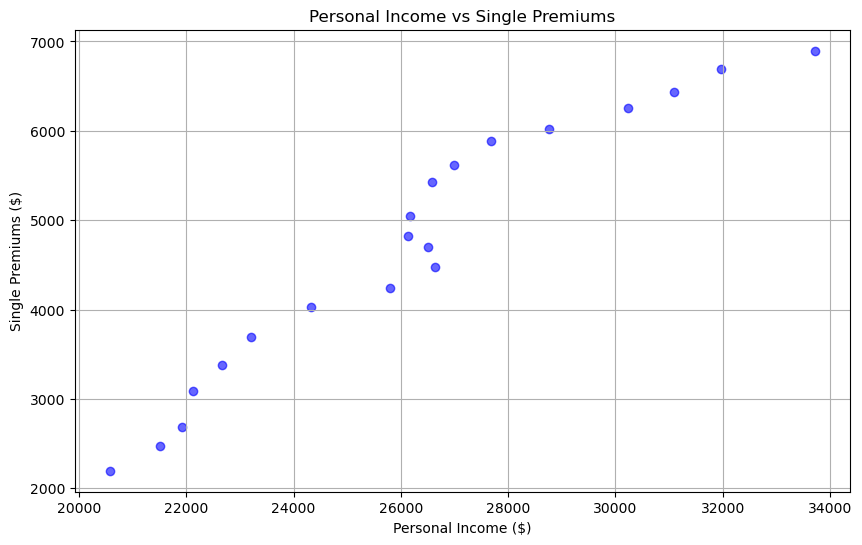

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(single_premiums_merged['Personal_Income'], single_premiums_merged['Healthcare_Expense'], color='blue', alpha=0.6)
plt.title('Personal Income vs Single Premiums')
plt.xlabel('Personal Income ($)')
plt.ylabel('Single Premiums ($)')
plt.grid(True)
plt.show()


### **3-1. Line plot for Personal Income vs Single Premiums Over Time with simplified year format**

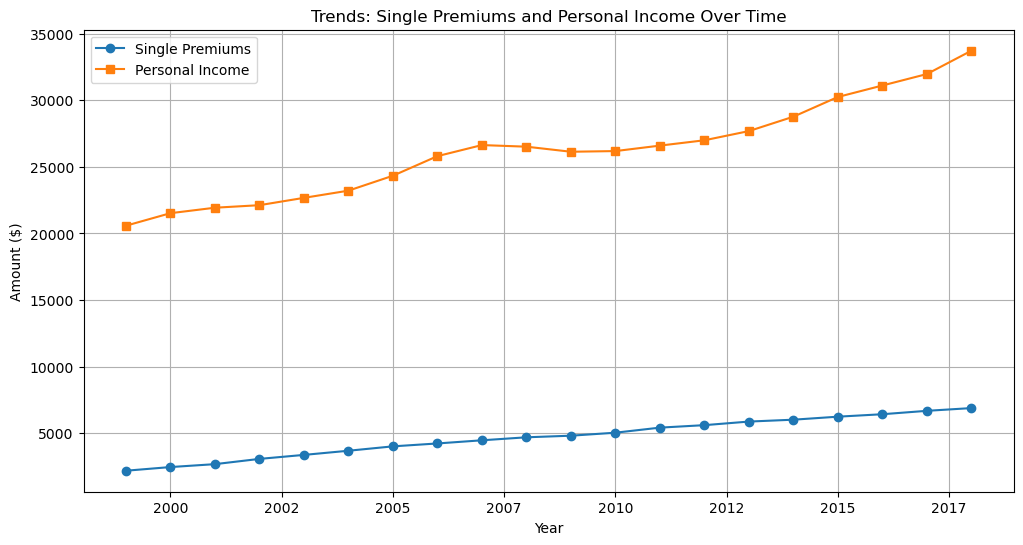

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(single_premiums_merged['Year'], single_premiums_merged['Healthcare_Expense'], label='Single Premiums', marker='o')

plt.plot(single_premiums_merged['Year'], single_premiums_merged['Personal_Income'], label='Personal Income', marker='s')

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.title('Trends: Single Premiums and Personal Income Over Time')
plt.xlabel('Year')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid(True)
plt.show()



### **3-3. Scatter plot for Household Income vs Family Premiums**

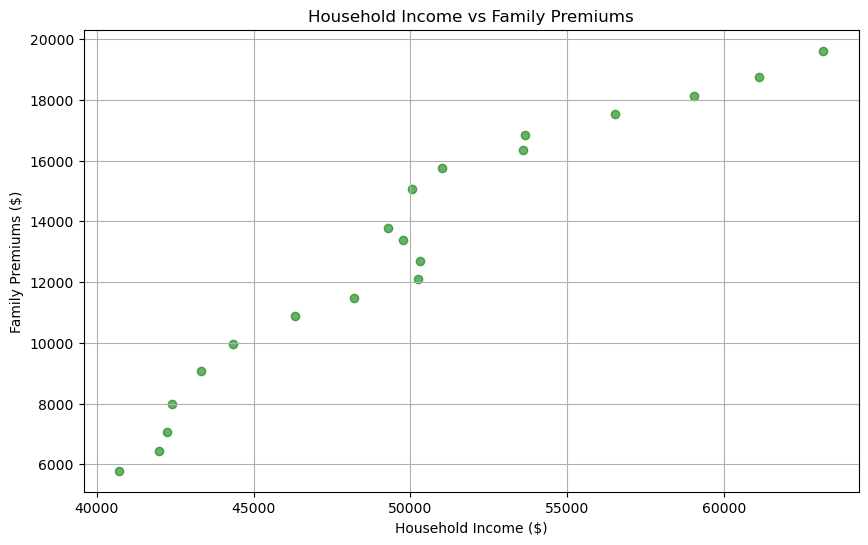

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(family_premiums_merged['Household_Income'], family_premiums_merged['Healthcare_Expense'], color='green', alpha=0.6)
plt.title('Household Income vs Family Premiums')
plt.xlabel('Household Income ($)')
plt.ylabel('Family Premiums ($)')
plt.grid(True)
plt.show()

### **3-4. Line plot for Household Income vs Family Premiums Over Time with simplified year format**

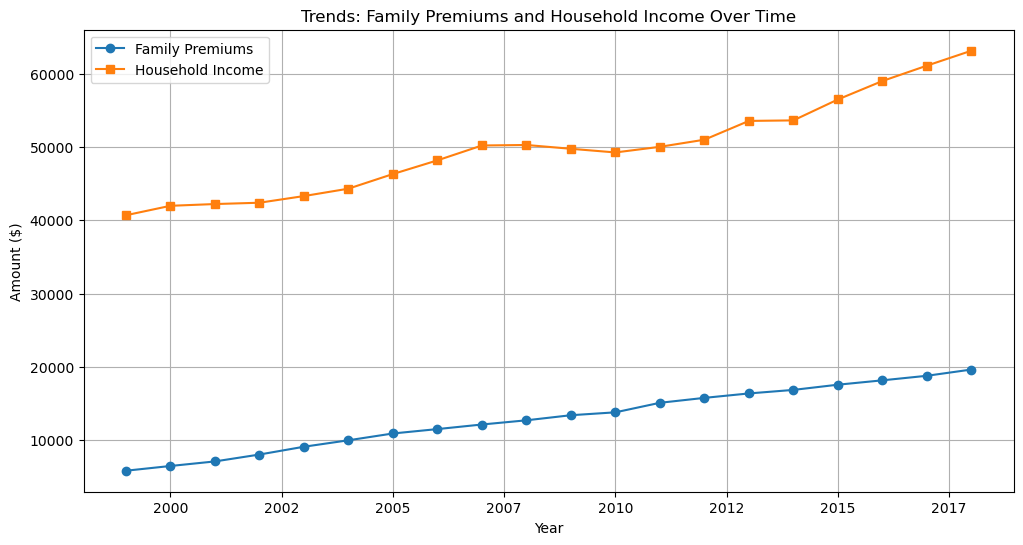

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(family_premiums_merged['Year'], family_premiums_merged['Healthcare_Expense'], label='Family Premiums', marker='o')

plt.plot(family_premiums_merged['Year'], family_premiums_merged['Household_Income'], label='Household Income', marker='s')

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.title('Trends: Family Premiums and Household Income Over Time')
plt.xlabel('Year')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid(True)
plt.show()


## **Insights and Conclusions**

### **Insights Based on the Outputs**

#### **Trend Analysis: Personal Income vs Single Premiums**
- **Observation**:
  - Both **Single Premiums** and **Personal Income** have increased over time.
  - Single Premiums show a steeper rate of increase, particularly in recent years, compared to Personal Income.
- **Interpretation**:
  - Single Premiums are growing disproportionately faster than Personal Income, which supports **Hypothesis 1**.
  - This suggests a potential financial burden on individuals as healthcare expenses outpace income growth.

---

#### **Trend Analysis: Household Income vs Family Premiums**
- **Observation**:
  - Both **Family Premiums** and **Household Income** show upward trends, but Family Premiums have a more pronounced growth rate.
  - Household Income appears to grow steadily but at a slower rate than Family Premiums.
- **Interpretation**:
  - Family Premiums are increasing disproportionately faster than Household Income, confirming **Hypothesis 1** in the family coverage context.
  - Families may face higher healthcare cost burdens relative to their income growth.

---

#### **Correlation Between Income and Premiums**
- **Observation**:
  - Scatter plots indicate a positive correlation between income (both household and personal) and premiums (Single and Family).
  - However, the correlation appears weaker for lower income levels and becomes stronger for higher income levels.
- **Interpretation**:
  - Supports **Hypothesis 2**: Higher incomes are positively correlated with higher premiums, likely due to increased purchasing power for employer-sponsored coverage or richer plans.

---

### **Follow-up Questions Addressed**

#### 1. **If healthcare expenses are not proportional to income growth, what factors might explain the disparity?**
- **Insights**:
  - **Inflation**: Healthcare inflation significantly outpaces general inflation, contributing to rising premiums.
  - **Policy Changes**: Periods of policy reform (e.g., Affordable Care Act implementation) could have affected premium growth.
  - **Regional Variations**: Premium rates and income growth may vary across states or urban vs rural areas.
  - **Employer Cost-Shifting**: Employers may transfer more healthcare costs to employees, increasing premium rates.

---

#### 2. **Are premiums growing faster for single or family coverage?**
- **Insights**:
  - Based on the charts, **Family Premiums** are growing faster than Single Premiums in absolute dollar terms.
  - This suggests that families face a larger relative financial burden, potentially due to higher risk pooling or greater healthcare utilization.

---

### **Conclusions**
1. **Healthcare Premiums are Growing Disproportionately**:
   - Both Single and Family Premiums are increasing significantly faster than personal and household incomes, creating a financial strain.

2. **Higher Incomes Correlate with Higher Premiums**:
   - Premiums are positively correlated with income, but the disparity between premium growth and income growth suggests affordability concerns, especially for lower-income groups.

3. **Family Coverage is a Larger Burden**:
   - Family Premiums are growing faster than Single Premiums, increasing the financial burden on families relative to individuals.

---

### **Recommendations**
1. **Policy Intervention**:
   - Explore subsidies or tax credits to make premiums more affordable for lower-income groups.
   - Encourage cost containment strategies in healthcare to slow premium growth.

2. **Further Analysis**:
   - Investigate regional disparities and inflation-adjusted income to understand the full impact of healthcare costs.

3. **Employer Practices**:
   - Examine how employers' cost-sharing strategies affect premium growth rates for employees.
